In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
df =  pd.read_csv('heart_2020_cleaned.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


##### Se busca Relación entre BMI y enfermedad cardiáca.

In [ ]:
df[df['BMI']>30][df['HeartDisease']=='Yes'].corr()

###### Se crea una tabla en donde sólo contenta sexo y enfermedad cardiáca para identificar si hay alguna relación

In [7]:
df2 = df[['HeartDisease', 'Sex']]

In [8]:
Heart_Disease_by_sex = df2[df['HeartDisease']=='Yes']

In [9]:
Heart_Disease_by_sex.value_counts()

HeartDisease  Sex   
Yes           Male      16139
              Female    11234
dtype: int64

<AxesSubplot:xlabel='HeartDisease,Sex'>

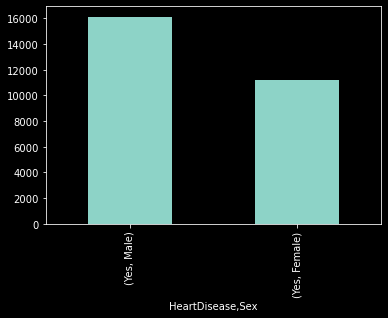

In [10]:
style.use('dark_background')
Heart_Disease_by_sex.value_counts().plot(kind='bar')

###### Comparación entre edad y enfermedad cardiáca 

In [11]:
df[['AgeCategory', 'HeartDisease']][df['HeartDisease']=='Yes'].value_counts()

AgeCategory  HeartDisease
80 or older  Yes             5449
70-74        Yes             4847
65-69        Yes             4101
75-79        Yes             4049
60-64        Yes             3327
55-59        Yes             2202
50-54        Yes             1383
45-49        Yes              744
40-44        Yes              486
35-39        Yes              296
30-34        Yes              226
25-29        Yes              133
18-24        Yes              130
dtype: int64

###### Se puede observar una clara relación entre la edad y la enfermedad cardiáca.

<AxesSubplot:xlabel='AgeCategory,HeartDisease'>

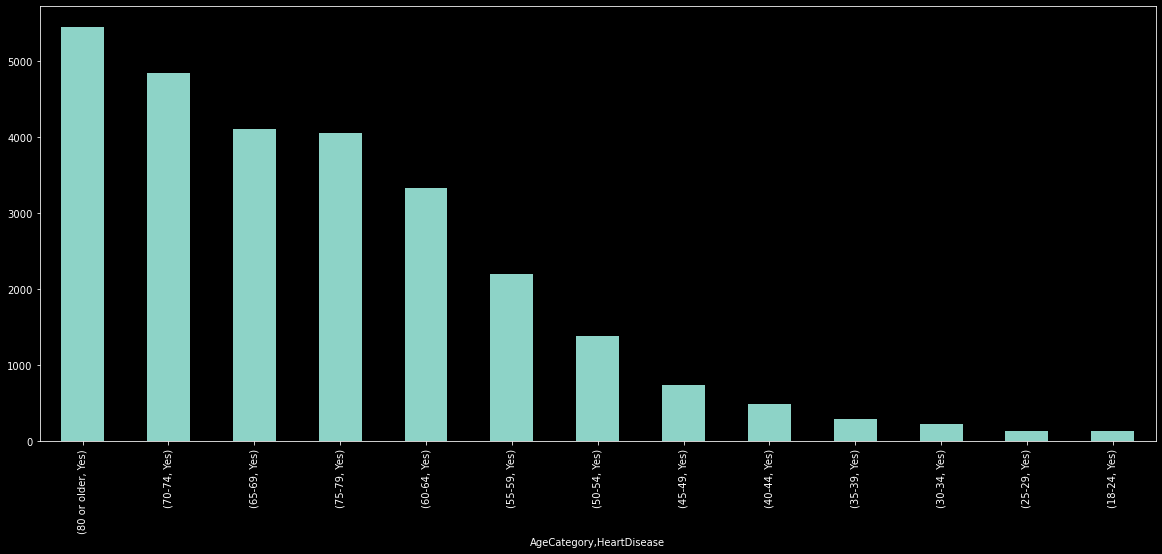

In [12]:
plt.figure(figsize=(20,8))
df[['AgeCategory', 'HeartDisease']][df['HeartDisease']=='Yes'].value_counts().plot(kind='bar')

###### Agregamos el factor 'Sex' para ver si encontramos alguna nueva pista.

In [13]:
df[['AgeCategory', 'HeartDisease','Sex']][df['HeartDisease']=='Yes'].value_counts()

AgeCategory  HeartDisease  Sex   
70-74        Yes           Male      3037
80 or older  Yes           Male      2821
65-69        Yes           Male      2634
80 or older  Yes           Female    2628
75-79        Yes           Male      2407
60-64        Yes           Male      2070
70-74        Yes           Female    1810
75-79        Yes           Female    1642
65-69        Yes           Female    1467
55-59        Yes           Male      1294
60-64        Yes           Female    1257
55-59        Yes           Female     908
50-54        Yes           Male       787
                           Female     596
45-49        Yes           Male       424
                           Female     320
40-44        Yes           Male       243
                           Female     243
35-39        Yes           Male       148
                           Female     148
30-34        Yes           Male       127
                           Female      99
18-24        Yes           Male        80


<AxesSubplot:xlabel='AgeCategory,HeartDisease,Sex'>

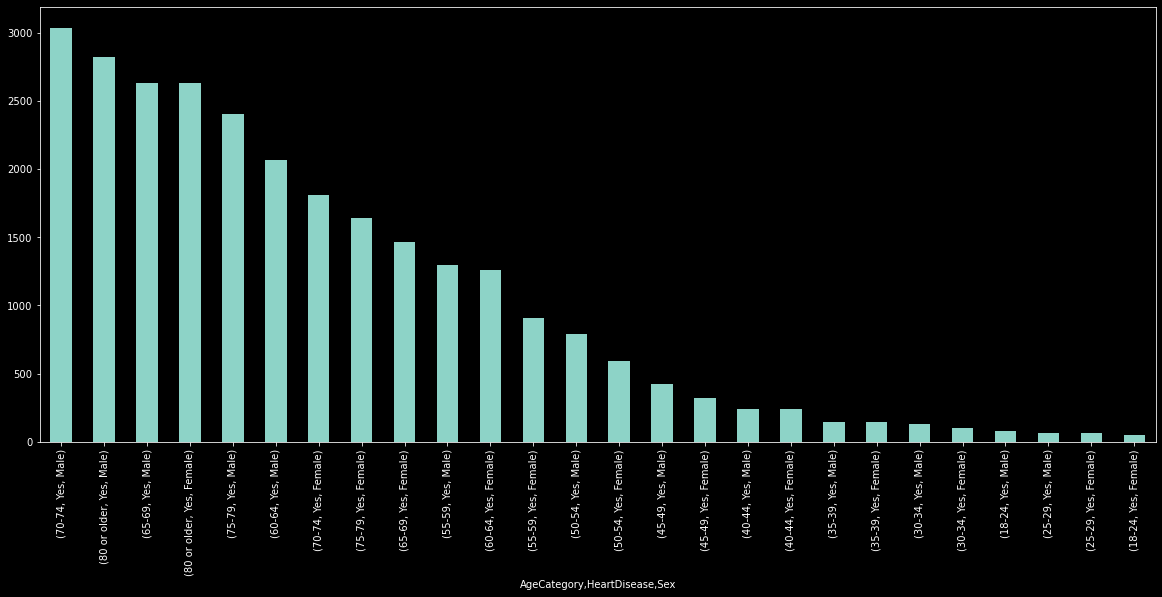

In [14]:
plt.figure(figsize=(20,8))
df[['AgeCategory', 'HeartDisease','Sex']][df['HeartDisease']=='Yes'].value_counts().plot(kind='bar')

##### Creamos un DF con sólo los atributos numéricos :

In [15]:
df_numerical = df._get_numeric_data()
df_numerical.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


###### Creamos boxplots y eliminamos los outliers

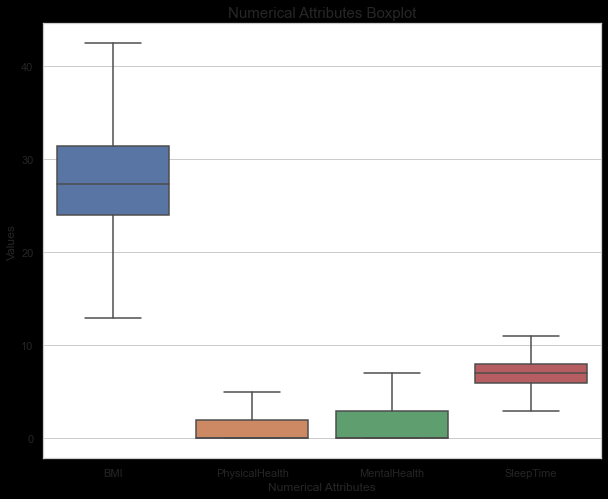

In [16]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_numerical, showfliers=False)  # outliers ignorados para la creación de la figura
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

In [17]:
df_numerical = df_numerical.join(df['HeartDisease'])

In [23]:
df_numerical.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


<AxesSubplot:>

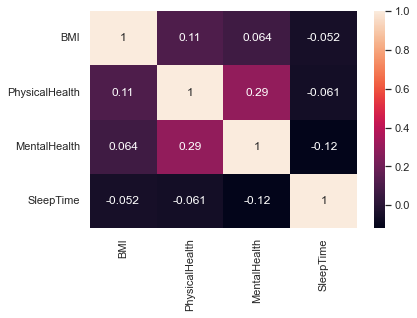

In [24]:
sns.heatmap(df_numerical.corr(), annot=True)

<AxesSubplot:>

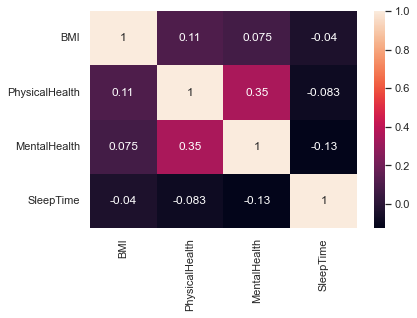

In [25]:
sns.heatmap(df_numerical[df_numerical['HeartDisease']=='Yes'].corr(), annot=True)